In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.shape

(1025, 14)

In [5]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
828,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
557,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
442,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
446,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
934,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
576,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [9]:
df.corr()["target"]

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

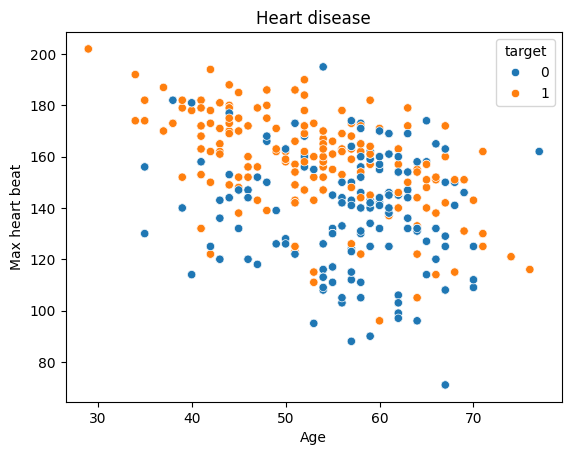

In [10]:
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title("Heart disease")
plt.xlabel("Age")
plt.ylabel("Max heart beat")
plt.legend(title='target')
plt.show()

In [11]:
x = df.drop("target", axis=1)
y = df["target"]

xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.1, random_state=5)

In [12]:
sc= StandardScaler()
xtr=sc.fit_transform(xtr)
xte=sc.transform(xte)
model = LogisticRegression()
model.fit(xtr, ytr)

LogisticRegression()

In [13]:
ypr=model.predict(xte)
accuracy_score(ypr, yte)

0.912621359223301

In [14]:
confusion_matrix(ypr, yte)

array([[41,  1],
       [ 8, 53]])

In [15]:
f1_score(ypr, yte)

0.9217391304347826

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [17]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'gnb': gnb, 
    'GBDT':gbdt}

In [18]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)  
    return accuracy,recall

In [19]:
accuracy_scores = []
recall_scores = []
f1_score= []
for name,clf in clfs.items():
    current_accuracy,current_recall = train_classifier(clf, xtr,ytr,xte,yte)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("recall - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    recall_scores.append(current_recall)

For  SVC
Accuracy -  0.6504854368932039
recall -  0.5925925925925926
For  KN
Accuracy -  0.9223300970873787
recall -  0.9259259259259259
For  NB
Accuracy -  0.8737864077669902
recall -  0.9074074074074074
For  DT
Accuracy -  0.9320388349514563
recall -  0.9444444444444444
For  LR
Accuracy -  0.9029126213592233
recall -  0.9814814814814815
For  RF
Accuracy -  1.0
recall -  1.0
For  AdaBoost
Accuracy -  0.9320388349514563
recall -  0.9814814814814815
For  BgC
Accuracy -  1.0
recall -  1.0
For  gnb
Accuracy -  0.8252427184466019
recall -  0.8518518518518519
For  GBDT
Accuracy -  0.9514563106796117
recall -  0.9814814814814815


In [20]:
perform_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'recall':recall_scores}).sort_values('recall',ascending=False)
print(perform_df)
perform_df1 = pd.melt(perform_df, id_vars = "Algorithm")
perform_df1

  Algorithm  Accuracy    recall
5        RF  1.000000  1.000000
7       BgC  1.000000  1.000000
4        LR  0.902913  0.981481
6  AdaBoost  0.932039  0.981481
9      GBDT  0.951456  0.981481
3        DT  0.932039  0.944444
1        KN  0.922330  0.925926
2        NB  0.873786  0.907407
8       gnb  0.825243  0.851852
0       SVC  0.650485  0.592593


,Algorithm,variable,value
0,RF,Accuracy,1.000000
1,BgC,Accuracy,1.000000
2,LR,Accuracy,0.902913
3,AdaBoost,Accuracy,0.932039
4,GBDT,Accuracy,0.951456
5,DT,Accuracy,0.932039
6,KN,Accuracy,0.922330
7,NB,Accuracy,0.873786
8,gnb,Accuracy,0.825243
9,SVC,Accuracy,0.650485


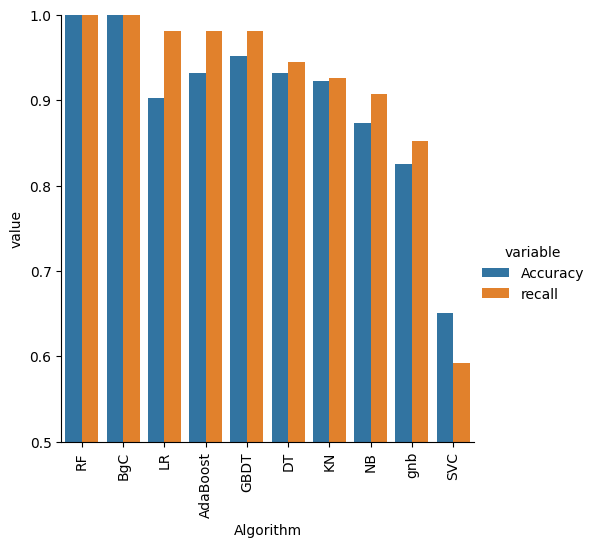

In [21]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=perform_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
rfc.fit(xtr, ytr)

RandomForestClassifier(n_estimators=50, random_state=2)

In [23]:
ypr=rfc.predict(xte)
print('accuracy',accuracy_score(ypr, yte))
print('recall score = ',recall_score(yte,ypr))
print(confusion_matrix(ypr, yte))

accuracy 1.0
recall score =  1.0
[[49  0]
 [ 0 54]]


TypeError: 'list' object is not callable

In [45]:
import pickle
pickle.dump(model,open('model.pkl','wb'))